# <center> Linear Regresion </center>

In [1]:
import sklearn as skl
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt


from sklearn.datasets import load_boston
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

In [8]:
boston_dataset = load_boston()

print(boston_dataset.DESCR)

X = boston_dataset.data
Y = boston_dataset.target

n, p = X.shape

print(boston_dataset.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

## Analysis of Data

---

---
coefficent of Correlationship: 0.695359947071539
---
Mean value of house with RM between ->  5 > RM > 6 : 17.551592356687898


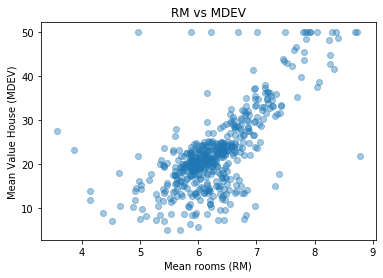

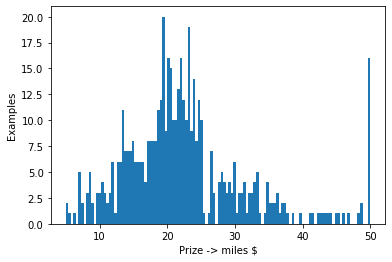

Abnormal mean home value for exactly $ 50,000. Possible truncation


In [12]:

print("---")
print("coefficent of Correlationship:", np.corrcoef(X[:, 5], Y)[0, 1])

print("---")
mask = np.logical_and(X[:,5] > 5, X[:,5] < 6)
print("Mean value of house with RM between ->  5 > RM > 6 :", np.mean(Y[mask]))


plt.title("RM vs MDEV")
plt.xlabel("Mean rooms (RM)")
plt.ylabel("Mean Value House (MDEV)")
plt.scatter(X[:, 5], Y, alpha=0.4)
plt.show()



plt.hist(Y, bins=120)
plt.ylabel('Examples')
plt.xlabel('Prize -> miles $')
plt.show()

print('''Abnormal mean home value for exactly $ 50,000. Possible truncation''')

## <center> Simple Linear Regression - Ordinary least squares </center>
<br>
<center> $ W = (X^TX)^{-1}X^TY $ </center>

---

## <center> Mean Squared Error </center>
<br>
<center> $ \operatorname{MSE}=\frac{1}{n}\sum_{i=1}^n(Y_{Pi} - Y_i)^2. $ </center>

---


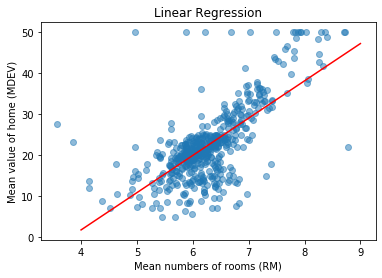

---
Value predicted for a home with 3 rooms:  [47.24836005]
Mean rooms in homes for 45.000$:  [8.75298471]
---
Mean Squared Error: 43.60055177116956


In [14]:

plt.title("Linear Regression")
plt.scatter(X[:, 5], Y, alpha=0.5)
plt.xlabel("Mean numbers of rooms (RM)")
plt.ylabel("Mean value of home (MDEV)")

aX = np.hstack((np.ones((n,1)), X[:,5:6]))

_Y = Y[:, np.newaxis]

# Linear regression aplication
W = np.linalg.inv(aX.T @ aX) @ aX.T @ _Y

# Plot the regression
x0 = [4, 9]
plt.plot(x0, [W[0, 0] + W[1, 0] * x0[0], 
              W[0, 0] + W[1, 0] * x0[1]], 
         c="red")

plt.show()

print("---")

print("Value predicted for a home with 3 rooms: ", [1, 9] @ W)
print("Mean rooms in homes for 45.000$: ", (45 - W[0])/W[1])

print("---")

Yp = aX @ W

MSE = lambda Yp, Y: np.mean(np.power(Yp - Y[:, np.newaxis], 2))
print("Mean Squared Error:", MSE(Yp, Y))

## Simple Linear Regression with Sklearn.

---


In [22]:

regr = linear_model.LinearRegression()

regr.fit(X[:, 5:6], Y[:, np.newaxis])

y_pred = regr.predict([[9]])

print(regr.coef_, regr.intercept_)
print(y_pred)
print(mean_squared_error(Y, regr.predict(X[:, 5:6])))

[[9.10210898]] [-34.67062078]
[[47.24836005]]
43.60055177116956


## <center> Multiple Linear Regression </center>

<center> $ W = (X^TX)^{-1}X^TY $ </center>

---

In [27]:
regr = linear_model.LinearRegression()
regr.fit(aX, Y[:, np.newaxis])


print("---")
print(regr.intercept_, regr.coef_)
print("Mean Squared Error :", mean_squared_error(Y, regr.predict(aX)))


---
[18.56711151] [[ 0.          4.51542094 -0.93072256 -0.57180569]]
Mean Squared Error : 27.130405758497062
